# Exercice 2: Clustering and Plane Detection

## Context
In this exercise, we propose to apply a **topological clustering** algorithm to perform a geometrical analysis task on 3D shapes: the detection of planar structures.

The input data is a point cloud describing the shape of a 3D surface, as well as the information on the normal vector of the surface for each point. Such data is typically generated by 3D acquisition techniques such as **Lidar** or **photogrammetry**.

## Import dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd

from gudhi.clustering.tomato import Tomato
from sklearn.manifold import MDS

## Question 1: Plane detection on a cube

1) Load the `data/cube.npy` dataset, what is the nature of the data ?

In [3]:
data = np.load("./data/cube.npy")

Plot the data as a 3d point cloud using 3 different coordinates, what does the data represent ? 

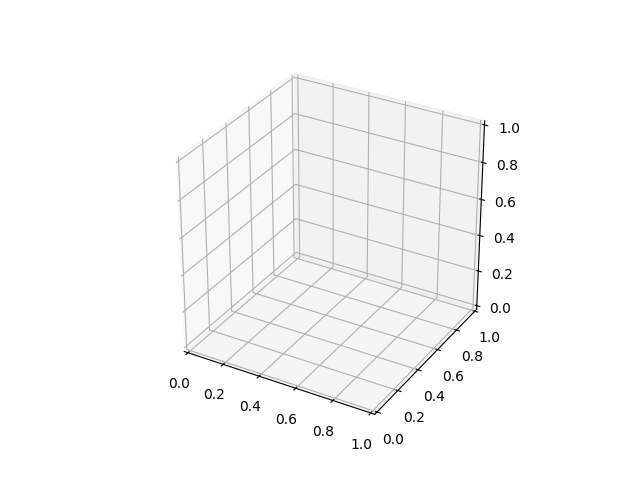

In [4]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# plot the data here
# use the fonction scatter() from matplotlib
ax.set_aspect('equal')
plt.show()

3. We want to be able to extract **planar structures** in the data. What topological feature may encode these structures ?

You may compute and display the Rips Complex of the data, both in 3D and 6D, to help you answer. You can refer to the minimal example previously provided: *tda_working_example.ipynb*

4. Visualize the wanted topological features in a **persistence diagram**.

## Question 2: Topological clustering 

In this question, we use the topological clustering algorithm provided in `Tomato` to perform the plane segmentation.
`Tomato` works by estimating a **density function** on our point cloud data, and merges peaks of density until the wanted number of clusters in reached.

1) First import the module and fit the data:

In [5]:
t = Tomato()
t.fit(data)

2. The number of clusters is stored in the `t.n_clusters_` attribute, while the resulting point classification is stored in `t.labels_`. The values of the estimated density function are located in `t.weights`.

    a. What is the returned number of clusters ?
   
    b. Displays the segmentation in 3D using the code of the first question, by adding `t.labels_` as the `c` parameter in the `scatter()` function.

    c. What number of clusters should be more appropriate ? Why ? Change the number of clusters to this new value and observe the results.

3. To understand how the clustering performs in the 6D space, we can use multi-dimensional scaling to project the data in 2D. Compare the two representation presented below.


In [7]:
mds = MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2)
e = mds.fit_transform(data)

/home/julius/pyenvs/tda/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


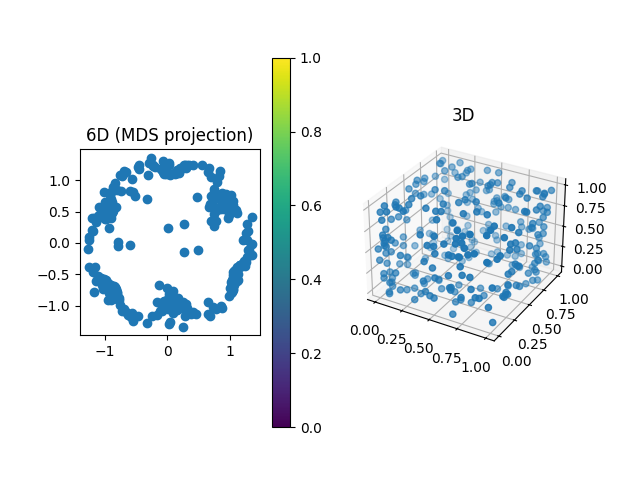

In [8]:
fig_mds = plt.figure()
ax_mds = fig_mds.add_subplot(121)
plt.set_cmap('viridis')
scatter = ax_mds.scatter(e[:,0], e[:,1])
ax_mds.set_aspect('equal')
ax_mds.set_title('6D (MDS projection)')

ax_mds2 = fig_mds.add_subplot(122, projection='3d')
scatter2 = ax_mds2.scatter(data[:,0], data[:,1], data[:,2])
ax_mds2.set_title('3D')

plt.colorbar(scatter)


4. Change the coloring of the points to display the density function estimated with `Tomato`, then the resulting classification.plt.close()

## Question 3: Gear Wheel

Here we apply the same analysis pipeline to a more complex dataset: a mechanical piece in the shape of a gear wheel.

1. Load the dataset `data/gearWheel,npy` and display the shape in 3D. 

In [9]:
data = np.load('data/gearWheel.npy')

2. Use `Tomato` to perform a segmentation of the planar structures in the data. How can we choose the number of clusters ?

   Note that the function `plot_diagram()` of `Tomato` allows to directly display the 0-th dimensional persistence diagram.

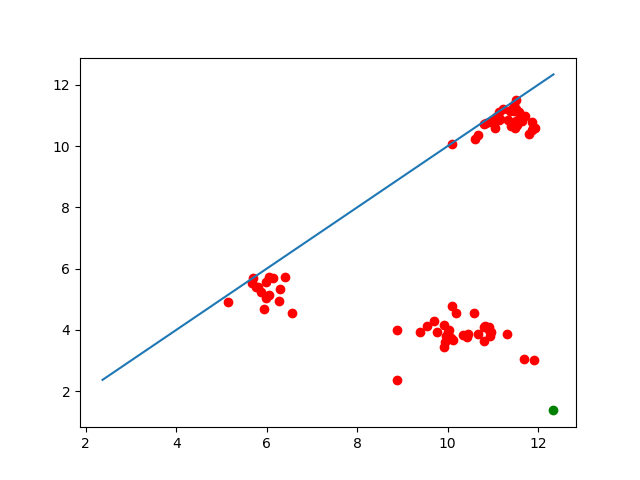

In [12]:
fig2 = plt.figure()
t = Tomato(k=30)
t.fit(data)
t.plot_diagram()

3. Display and discuss the results, how does the method performs ? 